# Requirements
* Install `pytorch`
* You need python 3.5
* Run the following commands on your bash screen:
```
$ git clone https://github.com/Diviyan-Kalainathan/CausalDiscoveryToolbox.git  # Download the package 
$ cd CausalDiscoveryToolbox
$ pip install -r requirements.txt  # Install the requirements
$ python setup.py install develop --user
```
**NOTE** Be careful about the last line that install the requirements. It is better to install them using `conda install -c anaconda ` instead. This way you don't mess up your python.

# Setting up environment

In [5]:
import os
import sys

sys.path.append('/Users/kayhan/Projects/gitSandBox/CausalDiscoveryToolbox')

# I am not sure we need all of the following -- clean up
import cdt
from cdt import SETTINGS
SETTINGS.verbose=False
SETTINGS.NB_JOBS=4
import networkx as nx
import time
# A warning on R libraries might occur. It is for the use of the r libraries that could be imported into the framework
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


Detecting 0 CUDA devices.
No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NB_JOBS to cpu_count.


# Rearding data from Lung Cancer
The dataset of this notebook are adopted from here:
https://github.com/Diviyan-Kalainathan/CausalDiscoveryToolbox/blob/master/examples/Discovery_LUCAS.ipynb

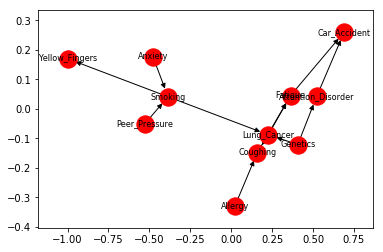

,Allergy,Anxiety,Genetics,Peer_Pressure,Attention_Disorder,Smoking,Lung_Cancer,Yellow_Fingers,Coughing,Fatigue,Car_Accident
0,-0.266076,0.460788,-0.359440,-0.403187,-0.228317,1.334455,0.574623,1.163336,0.982726,-0.840672,-0.508322
1,-0.579084,-0.846836,-0.295204,0.302683,-0.256269,-1.637193,-1.395067,0.154516,0.341314,0.933638,-1.075662
2,-0.105876,0.603170,-0.246007,-0.066926,-0.100983,0.500359,0.329122,0.199425,0.314847,-0.143226,-0.755328
3,0.727293,-0.949493,0.749637,-0.595794,0.809405,-0.586919,-0.130269,-0.840610,-0.691177,0.303761,-0.431910
4,-0.175018,-0.820478,-0.432949,-0.729511,-0.753609,-0.219810,-0.700120,-0.733240,-0.149308,0.854195,-0.633940


In [17]:
# Load data and graph solution
data = pd.read_csv("NUM_LUCAS.csv")
solution = cdt.utils.read_list_edges("Lucas_graph.csv")  
nx.draw_networkx(solution, font_size=8,k=0.15,iterations=200) # The plot function allows for quick visualization of the graph. 
plt.show()
data.head()

In this part of the course, we do not focus on the how this graphs is given, we assume that it is given.

# Regression: Can and Cannot
Let's focus on three variables: *Yellow Finger* ($X$), *Smoking* ($Y$) , and *Lung Cancer* ($Z$). Let's say someone claims that yellow finger results in lung cancer! He say, I did a regression and they are correlated:

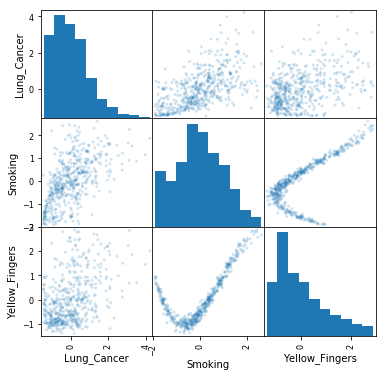

In [26]:
from pandas.plotting import scatter_matrix

_ = scatter_matrix(data[['Lung_Cancer','Smoking','Yellow_Fingers']], alpha=0.2, figsize=(6, 6), diagonal='hist')

In [31]:
from statsmodels.regression.linear_model import OLS

model = OLS(data[['Lung_Cancer']], data[['Yellow_Fingers']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Lung_Cancer   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     114.3
Date:                Wed, 16 May 2018   Prob (F-statistic):           3.65e-24
Time:                        14:59:04   Log-Likelihood:                -657.90
No. Observations:                 500   AIC:                             1318.
Df Residuals:                     499   BIC:                             1322.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Yellow_Fingers     0.4317      0.040     10.692      0.000       0.352       0.511
==============================================================================
Omnibus:                       43.357   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.564
Skew:                           0.702   Prob(JB):                     1.42e-12
Kurtosis:                       3.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What if we combine it with smoking history:

In [32]:
model = OLS(data[['Lung_Cancer']],data[['Yellow_Fingers','Smoking']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Lung_Cancer   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     128.4
Date:                Wed, 16 May 2018   Prob (F-statistic):           1.04e-45
Time:                        14:59:12   Log-Likelihood:                -605.48
No. Observations:                 500   AIC:                             1215.
Df Residuals:                     498   BIC:                             1223.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Yellow_Fingers     0.0210      0.053      0.398      0.691      -0.083       0.125
Smoking            0.5680      0.053     10.779      0.000       0.464       0.672
==============================================================================
Omnibus:                       63.411   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.851
Skew:                           0.858   Prob(JB):                     6.88e-21
Kurtosis:                       4.230   Cond. No.                         2.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interesting! Now that we have included the smoking history, the yellow finger become insignificant. .... [WRITE MORE]

# Conditional Independence

Explain the notion of conditional independce . Use medium..


# What is Propensity score

# Refs
[1] https://medium.com/@akelleh/a-technical-primer-on-causality-181db2575e41

[2] https://medium.com/causal-data-science/understanding-bias-a-pre-requisite-for-trustworthy-results-ee590b75b1be

[3] https://github.com/Diviyan-Kalainathan/causal-humans

[4] https://github.com/Diviyan-Kalainathan/CausalDiscoveryToolbox

[5] https://github.com/Diviyan-Kalainathan/medi-chal

[6] https://github.com/akelleh/causality
